In [1]:
import pandas as pd
import numpy as np

In [2]:
df_tr = pd.read_csv("SalaryData_Train.csv")
df_te = pd.read_csv("SalaryData_Test.csv")

In [3]:
df_tr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_te

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Let us understand the data first

In [5]:
df_tr.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
for i in df_tr.columns:
    print(df_tr[i].value_counts())

age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64
educationno
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64
maritalstatus
 Marrie

### Lets ready the data for further processing

In [7]:
x_train = df_tr.iloc[:,:-1]
x_test = df_te.iloc[:,:-1]
y_train = df_tr.iloc[:,-1:]
y_test = df_te.iloc[:,-1:]


Lets save categorical and continuous columns in seperate lists for better processing

In [8]:
con_cols = [col for col in x_train.columns if x_train[col].dtype != "object"]
cat_cols = [col for col in x_train.columns if x_train[col].dtype == "object"]


In [9]:
con_cols

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [10]:
cat_cols

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

### Lets start Encoding the data

In [11]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

In [12]:
oe_train = pd.DataFrame(oe.fit_transform(x_train[cat_cols]).toarray())
oe_test = pd.DataFrame(oe.fit_transform(x_test[cat_cols]).toarray())


In [13]:
train_final = pd.concat([oe_train,x_train[con_cols]],axis=1)
test_final = pd.concat([oe_test,x_test[con_cols]],axis=1)


In [14]:
train_final

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,age,educationno,capitalgain,capitalloss,hoursperweek
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,39,13,2174,0,40
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,50,13,0,0,13
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,38,9,0,0,40
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,53,7,0,0,40
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,27,12,0,0,38
30157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40,9,0,0,40
30158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,58,9,0,0,40
30159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,22,9,0,0,20


### Lets train the model on the above created train and test sets

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
train_final.columns = train_final.columns.astype(str)
test_final.columns = test_final.columns.astype(str)


In [17]:
gnb = GaussianNB()
gnb.fit(train_final,y_train)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [18]:
y_pred = gnb.predict(test_final)


In [19]:
check_df = pd.DataFrame({"Predcited":y_pred,"Actual":np.array(y_test).reshape(-1)})

Lets put both the predictions and actual values in separate columns side by side for better understanding of the generated output accuracy

In [20]:
check_df

,Predcited,Actual
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,>50K,>50K
4,<=50K,<=50K
...,...,...
15055,<=50K,<=50K
15056,<=50K,<=50K
15057,>50K,<=50K
15058,>50K,<=50K


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
accuracy_score(y_test,y_pred)

0.8029216467463479

### Lets Visualize the results

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [38]:
cm

array([[9073, 2287],
       [ 681, 3019]])

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

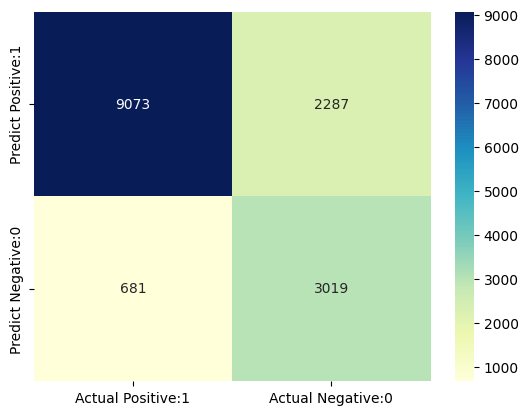

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve


### Convert string labels to binary integers


In [35]:
y_test_binary = (y_test == ' >50K').astype(int)
probs = gnb.predict_proba(test_final)[:, 1]


### Calculate AUC and ROC curve

In [34]:
auc = roc_auc_score(y_test_binary, probs)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs)


### Plot ROC curve


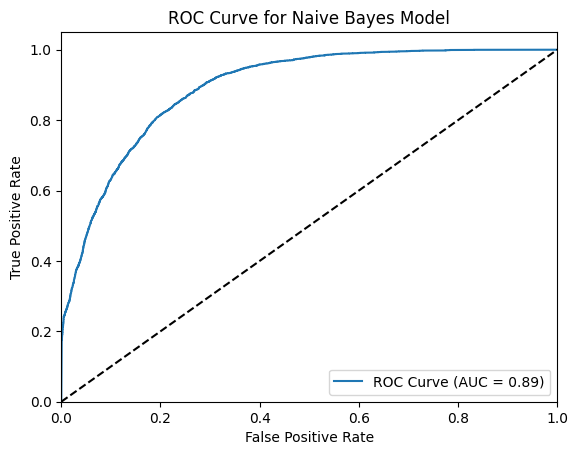

In [36]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()


This is the END